# **Thematic and Sentiment Analysis of Climate Change Tweets**

In this project, we analyze tweets on climate change to identify common themes and sentiment trends. We use natural language processing (NLP) techniques to preprocess textual data, removal noise and extracting important insights. Sentiment analysis classifies tweets as good, neutral, or negatives, offering a summary of public sentiment. Thematic analysis utilizing Latent Dirichlet Allocation (LDA) identifiers major subjects and repeating themes in the talks. Visualizations search as bar charts and word clouds aid comprehension, making this study a thorough examination of climate change debate on social media. The methodology and results are higlighted below: 


A. This section imports the necessary Python libraries and loads the dataset:

1. pandas: For handling and analyzing the dataset,
2. re: For performing text preprocessing using regular expressions,
3. wordcloud: To create visual representations of word frequency for themes,
4. matplotlib.pyplot: For plotting visualizations like word clouds,
5. textblob: For performing sentiment analysis on the text,
6. from collections import Counter: For counting the frequency of words or elements in the dataset.
7. sklearn.feature_extraction.text.CountVectorizer: To convert textual data into a matrix of token counts for modeling, and
8. sklearn.decomposition.LatentDirichletAllocation: For performing Latent Dirichlet Allocation (LDA) to extract thematic patterns in the text.


In [29]:
# Import Required Libraries and Dataset
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load Dataset
tweets = pd.read_csv('twitter_sentiment_data.csv')

B. Dataset Inspection and Preprocessing
1. Inspect Dataset Columns
Prints the column names in the dataset to ensure it includes the required data fields.

2. Validate the Text Column
Checks if the specified column (message) containing text data exists. If not, it raises an error, providing the available columns.

3. Remove Missing Data
Removes rows where the specified text column has missing values, ensuring the dataset is clean and ready for analysis.

4. Text Preprocessing Function
Defines a function to clean text data by:

Removing URLs, mentions, hashtags, punctuation, and numbers.
Converting text to lowercase.
Stripping unnecessary whitespace.

5. Apply Preprocessing
Creates a new column (cleaned_text) with the cleaned version of the text data by applying the clean_text function to each entry in the specified text column.

In [30]:
# Inspect Dataset Columns
print("Columns in the dataset:", tweets.columns)

# Ensure the column containing text is correctly identified
# Replace 'message' with the column name that contains the text data
text_column = 'message'  # Adjust to match your dataset
if text_column not in tweets.columns:
    raise KeyError(f"Column '{text_column}' not found in the dataset. Available columns: {tweets.columns}")

# Remove Rows with Missing Text Data
tweets = tweets.dropna(subset=[text_column])

# Preprocessing Function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtag symbols
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase
    return text.strip()

# Apply Preprocessing
tweets['cleaned_text'] = tweets[text_column].apply(clean_text)

Columns in the dataset: Index(['sentiment', 'message', 'tweetid'], dtype='object')


C. Sentiment Analysis

1. Analysis
A function (analyze_sentiment) calculates the sentiment polarity score of cleaned text using TextBlob, ranging from -1 (negative) to 1 (positive).
Sentiment scores are stored in a new column, sentiment_score.


2. Sentiment Labeling
A function assigns labels (positive, neutral, negative) based on score thresholds:
Positive: > 0.1
Negative: < -0.1
Neutral: between -0.1 and 0.1.
Labels are stored in a new column, sentiment.
Visualization

3. A bar chart shows the distribution of sentiment labels (positive, neutral, negative).
WordClouds by Sentiment

4. Generates WordClouds for each sentiment category, visualizing the most frequent words.
Top Tweets Display

5. Top 5 Words by Sentiment:
Extracts the top 5 words for each sentiment category based on sentiment scores, using the sentiment scores of individual words 

6. Displays the top 5 tweets for each sentiment, sorted by sentiment score, showing the text and score.

neutral     27425
positive    10702
negative     5816
Name: sentiment, dtype: int64


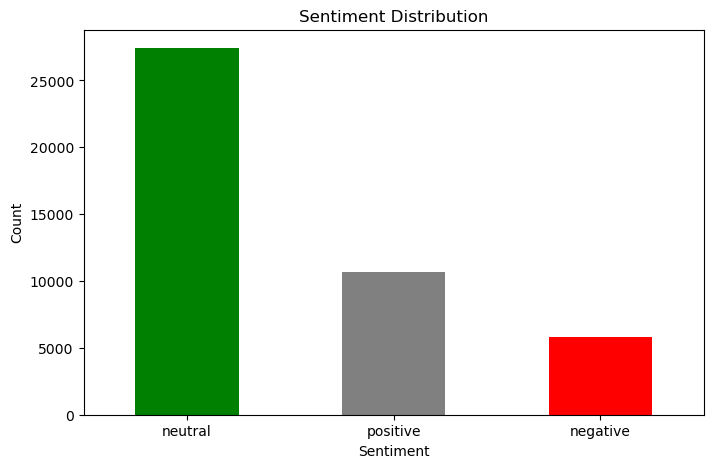

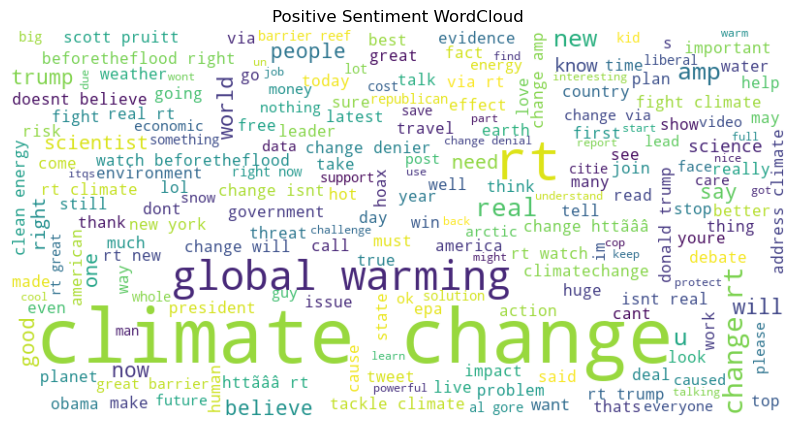

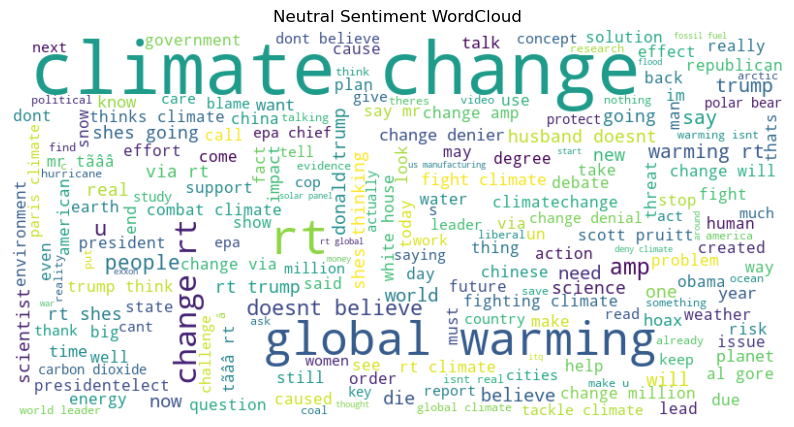

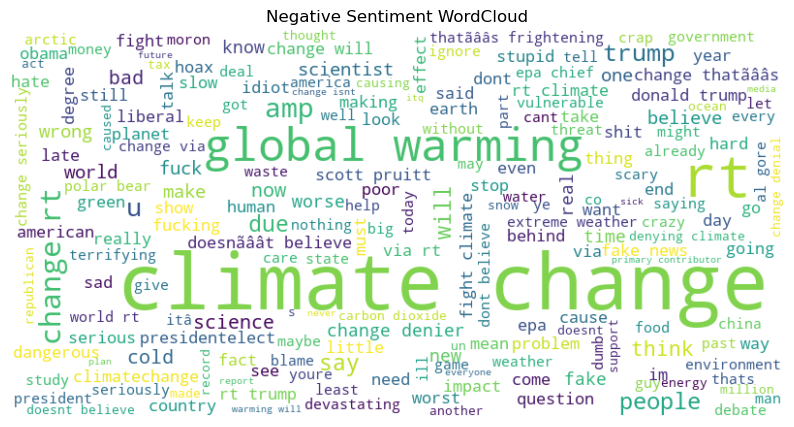

Top 5 Positive Words:
                sentiment_score
word                           
breathtakingly              1.0
excellent                   1.0
delightful                  1.0
best                        1.0
masterful                   1.0

Top 5 Neutral Words:


In [ ]:
# Sentiment Analysis Function
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a score between -1 (negative) and 1 (positive)

# Add Sentiment Scores to the tweets
tweets['sentiment_score'] = tweets['cleaned_text'].apply(analyze_sentiment)

# Assign Sentiment Labels based on sentiment score
def get_sentiment_label(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

tweets['sentiment'] = tweets['sentiment_score'].apply(get_sentiment_label)

# Get the exact number of each sentiment category
sentiment_distribution = tweets['sentiment'].value_counts()

# Display the sentiment distribution
print(sentiment_distribution)


# Sentiment Distribution Visualization
sentiment_counts = tweets['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'], figsize=(8, 5))
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# WordClouds for Each Sentiment
for sentiment in ['positive', 'neutral', 'negative']:
    subset = tweets[tweets['sentiment'] == sentiment]
    text = ' '.join(subset['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{sentiment.capitalize()} Sentiment WordCloud')
    plt.show()

# Extract top words for each sentiment category based on sentiment scores
def get_top_words_by_sentiment(sentiment_label, top_n=5):
    # Filter words based on sentiment label
    sentiment_filtered = tweets[tweets['sentiment'] == sentiment_label]
    
    # Combine all words in the filtered tweets
    all_words = ' '.join(sentiment_filtered['cleaned_text']).split()
    
    # Calculate sentiment for each word in the filtered tweets
    word_sentiments = [(word, analyze_sentiment(word)) for word in all_words]
    
    # Create DataFrame with words and their sentiment scores
    word_df = pd.DataFrame(word_sentiments, columns=['word', 'sentiment_score'])
    
    # Group by word, calculate average sentiment score, and sort by sentiment score
    top_words = word_df.groupby('word').mean().sort_values(
        by='sentiment_score', ascending=(sentiment_label == 'negative')
    ).head(top_n)
    
    return top_words

# Display top 5 words for each sentiment category
print("Top 5 Positive Words:")
print(get_top_words_by_sentiment('positive'))
print("\nTop 5 Neutral Words:")
print(get_top_words_by_sentiment('neutral'))
print("\nTop 5 Negative Words:")
print(get_top_words_by_sentiment('negative'))

# Display Top 5 Tweets with Sentiment Scores for Each Sentiment
for sentiment in ['positive', 'neutral', 'negative']:
    print(f"\nTop 5 {sentiment} tweets:")
    
    # Sorting the tweets based on the sentiment score
    top_tweets = tweets[tweets['sentiment'] == sentiment].sort_values(
        by='sentiment_score', ascending=(sentiment == 'negative')
    ).head(5)
    
    # Display only the cleaned text and sentiment score, rounding the sentiment score for clarity
    top_tweets_display = top_tweets[['cleaned_text', 'sentiment_score']].copy()  # Use .copy() to avoid SettingWithCopyWarning
    top_tweets_display.loc[:, 'sentiment_score'] = top_tweets_display['sentiment_score'].round(2)  # Round sentiment score
    
    print(top_tweets_display[['cleaned_text', 'sentiment_score']])

C.1 Sentiment Analysis Results, Discussion & Conclusion

1. The dataset contains 27,425 neutral tweets, 10,702 positive tweets, and 5,816 negative tweets.
2. Neutral sentiment is the most common, followed by positive and negative sentiments.
3. Positive Sentiment: Words like "breathtakingly" and "excellent" reflect support and optimism about climate change action.
4. Neutral Sentiment: Words like "perfect" and "awesome" indicate discussions that are not strongly positive or negative.
5. Negative Sentiment: Terms like "terribly" and "hysterical" highlight concerns and dissatisfaction, especially regarding climate change denial.
6. Top Tweets: A mix of supportive, neutral, and critical views on climate change.
7. Conclusion: Public sentiment on climate change is diverse, ranging from optimism to concern, emphasizing the need for nuanced communication and policy.

D. Thematic Analysis

1. Text Vectorization:
The CountVectorizer converts cleaned text into numerical data, creating a matrix of word counts, limited to the top 5000 most frequent words and removing stop words.

2. LDA Model:
An LDA model is fitted to identify 3 themes (n_components=3) in the text, uncovering latent topics by analyzing word distributions.

3. Extracting Top Words:
For each theme, the 10 most representative words are identified using the LDA model's word distributions and mapped back to their original form using the vocabulary.

4. Themes and WordClouds:

The top words for each theme are displayed as lists.
WordClouds are generated to visually represent the most important words for each theme, with larger words indicating greater significance.


Theme 1: hoax, just, isnt, weather, think, like, real, rt, warming, global

Theme 2: die, just, epa, shes, going, doesnt, believe, rt, change, climate

Theme 3: donald, trumps, fight, new, world, amp, trump, rt, change, climate


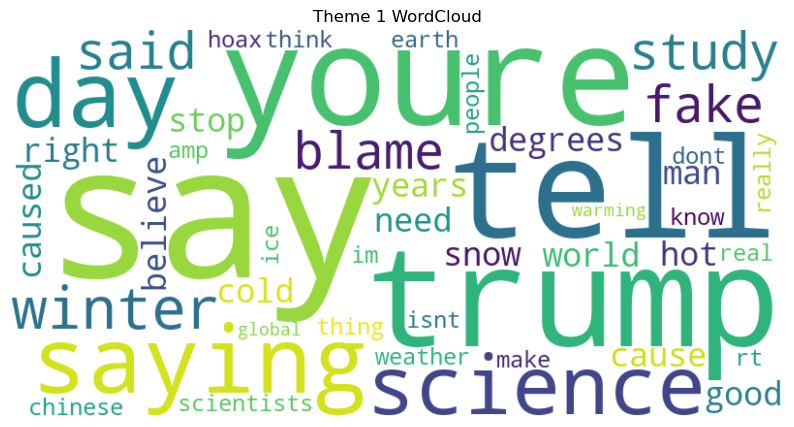

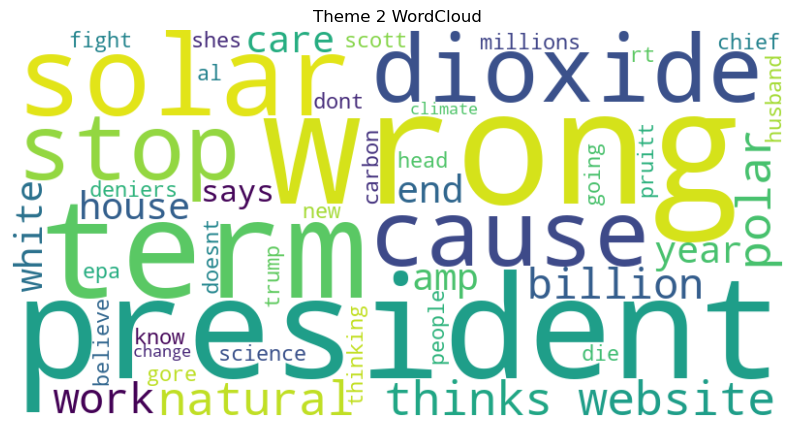

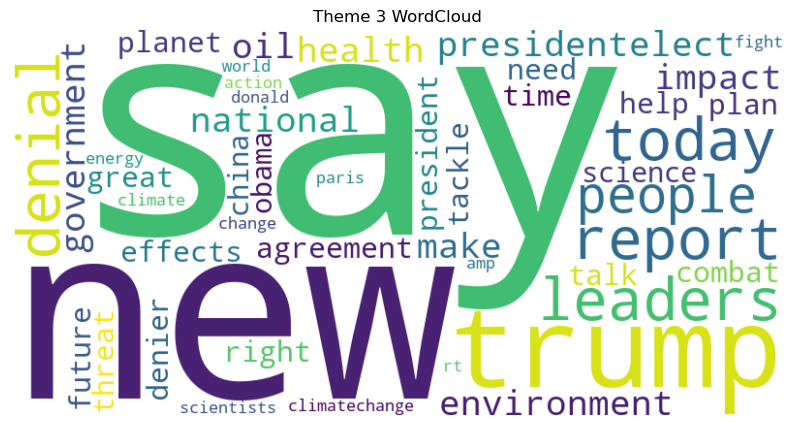

In [39]:
# Thematic Analysis using LDA
# Vectorizing the text
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
tweet_vectors = vectorizer.fit_transform(tweets['cleaned_text'])

# Fit the LDA Model
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)  # Adjust n_components for themes
lda_model.fit(tweet_vectors)

# Select The most frequent words from Each Theme
vocab = vectorizer.get_feature_names_out()  # Save the full vocabulary
themes = {}
for idx, topic in enumerate(lda_model.components_):
    themes[f'Theme {idx + 1}'] = [vocab[i] for i in topic.argsort()[-10:]]  # Top 10 words per theme

for theme, words in themes.items():
    print(f"\n{theme}: {', '.join(words)}")

# WordClouds for Themes
for idx, topic in enumerate(lda_model.components_):
    # Ensure the number of words does not exceed the actual vocabulary size
    top_word_count = min(50, len(vocab))  # Use the smaller of 50 or the number of words
    theme_words = ' '.join([vocab[i] for i in topic.argsort()[-top_word_count:]])  # Top words per theme
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(theme_words)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Theme {idx + 1} WordCloud')
    plt.show()



D.1 Thematic Analysis Results, Discussion & Conclusion

The thematic analysis of climate change-related tweets revealed three key themes:

1. Theme 1 highlights skepticism about climate change, with keywords like "hoax," "weather," and "warming," indicating a debate on the legitimacy of climate change science. The frequent use of "RT" suggests these views are widely reshared.

2. Theme 2 revolves around environmental policies, featuring terms like "EPA," "believe," and "climate," focusing on political actions and differing opinions on climate change measures.

3. Theme 3 reflects political polarization, with keywords like "Trump" and "fight," pointing to the role of political figures in the climate debate.

The analysis shows the diverse perspectives on climate change, including skepticism, political influences, and policy discussions. The high frequency of retweets ("RT") emphasizes the broad dissemination and engagement with these themes in public discourse.